# Zipf’s and Gibart’s Laws

In [92]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
from matplotlib import pyplot as plt

In [30]:
data = pd.read_csv("/Users/brunokomel/Downloads/US_supermarkets.csv")
df = pd.DataFrame(data, columns=['firm','number_of_stores'])

In [66]:
display(df)

,firm,number_of_stores
0,114 Grocery & Deli Incorporated,1
1,1st Oriental Supermarket,2
2,A & A Fine Foods,1
3,A & G Fine Foods Incorporated,1
4,A & P Food Stores,109
...,...,...
632,White Market,5
633,Whites Fresh Foods,13
634,Whole Foods Market,68
635,Winco,14


In [69]:
print(len(df.firm.unique()))
print(len(df))
#so there are no stores with repeated values (although from looking at the data some of these are really close)

637
637


(array([ 38., 104.,   0., 123.,  53.,  81.,  59.,  44.,  25.,  24.,  19.,
         15.,  10.,  17.,   6.,   6.,   1.,   3.,   3.,   4.,   1.,   1.]),
 array([0.        , 0.35728114, 0.71456228, 1.07184342, 1.42912456,
        1.78640569, 2.14368683, 2.50096797, 2.85824911, 3.21553025,
        3.57281139, 3.93009253, 4.28737367, 4.64465481, 5.00193595,
        5.35921708, 5.71649822, 6.07377936, 6.4310605 , 6.78834164,
        7.14562278, 7.50290392, 7.86018506]),
 <BarContainer object of 22 artists>)

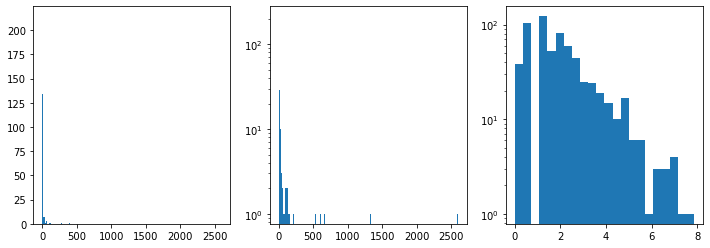

In [91]:
fig, (ax0,ax1,ax2) = plt.subplots(ncols =3, figsize =(12,4))

ax0.hist(df.number_of_stores, bins = 'auto')
ax1.hist(df.number_of_stores, bins = 'auto', log = True)
ax2.hist(np.log(df.number_of_stores), bins = 'auto' , log = True)

## 1. State Zipf’s Law. Why does Zipf’s Law suggest that certain variables have a Pareto distribution?


Zipfs law, which originally concerns frequency of words in liguistics, states that given some population, the frequency of any event is inversely proportional to its rank in the frequency table. More clearly, the most frequent event occurs about twice as often as the second most frequent event, three times as often as the third most frequent event, etc. 

Zipf's law suggests that certain variables follow a Pareto distribution because it is analogous to the continous Pareto distribution in the same way that the discrete uniform distribution is analogous to the continuous uniform distribution (from Wikipedia). 

## 2. State Gibart’s Law. Why does Gibart’s Law suggest that certain variables have a Log-Normal distribution?


Gilbart's law states that the proportional rate of growth of a firm is independent of its absolute size, thus the law of proportional growth gives rise to a firm size distribution that is log-normal (from Wikipedia).

## 3. Let Si be the number of stores that a supermarket chain i has. Estimate the density of S using a kernel density estimator. Indicate your choice of kernel function and bandwidth and justify these selections.


In [124]:
#display(df.number_of_stores[:])
#type(df.number_of_stores)
(df['number_of_stores'])
df.head()

,firm,number_of_stores
0,114 Grocery & Deli Incorporated,1
1,1st Oriental Supermarket,2
2,A & A Fine Foods,1
3,A & G Fine Foods Incorporated,1
4,A & P Food Stores,109


In [268]:
num_stores = df[['number_of_stores']].to_numpy()
np.shape(num_stores)

(637, 1)

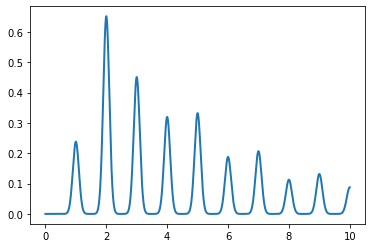

In [293]:
kde = KernelDensity(kernel = 'gaussian', bandwidth = 0.1).fit(num_stores)
X_plot = np.linspace(0, 10, 6370)[:, np.newaxis]
log_dens = kde.score_samples(X_plot)
plt.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel))

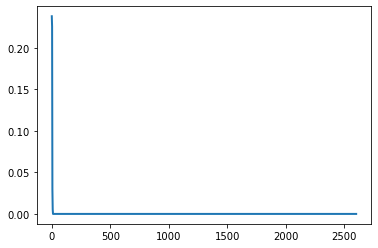

In [296]:
kde = KernelDensity(kernel = 'gaussian', bandwidth = 0.1).fit(num_stores)
X_plot = np.linspace(0, 2600, 1000)[:, np.newaxis]
log_dens = kde.score_samples(X_plot)
plt.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel))

In [135]:
import scipy.stats

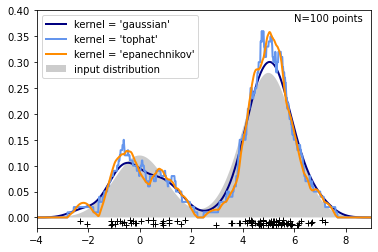

(1000, 1)

In [271]:
N = 100
np.random.seed(1)
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]

X_plot = np.linspace(-5, 10, 100*10)[:, np.newaxis]

true_dens = 0.3 * scipy.stats.norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * scipy.stats.norm(5, 1).pdf(X_plot[:, 0])

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc="black", alpha=0.2, label="input distribution")
colors = ["navy", "cornflowerblue", "darkorange"]
kernels = ["gaussian", "tophat", "epanechnikov"]
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc="upper left")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), "+k")

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

np.shape(X_plot)


## 4. Using a GMM estimate the Pareto distribution that fits the data. Report your results.

## 5. Using GMM estimate the log-Normal distribution that fits the data. Re- port your results.

## 6. Using a Kolmogorov-Smirnov test determine whether the log-Normal or the Pareto distribution represent the data. Which one is doing better according the K-S statistics?
